In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

In [56]:
#Data Prepration
import re

In [57]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

Clean Data

In [58]:
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()

Vocabulary

In [59]:
words = sentences.split()
vocab = set(words)

In [60]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

Implementation 

In [61]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

Data bags

In [62]:
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


Embeddings

In [63]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

Linear Model

In [64]:
def linear(m, theta):
    w = theta
    return m.dot(w) # Returns matrix multliplication

Log softmax + NLLloss = Cross Entropy

In [65]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum()) # computing the log of the softmax function for a given input vector x. 

In [66]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out) #computing the negative log-likelihood loss, 

In [67]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0] #computing the cross-entropy loss with log-softmax applied to logits.

Forward function

In [68]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

Backward function

In [69]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

Optimize function

In [70]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

#function for updating the model's parameters (theta) using gradient descent.

Training 

In [71]:
#Genrate training data

theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [72]:
epoch_losses = {}  # Create an empty dictionary to store losses for each epoch

for epoch in range(80):  # Loop through a total of 80 epochs

    losses = []  # Create an empty list to store losses for the current epoch

    for context, target in data:  # Iterate through your training data
        context_idxs = np.array([word_to_ix[w] for w in context])  # Convert context words to indices
        preds = forward(context_idxs, theta)  # Forward pass to obtain predictions

        target_idxs = np.array([word_to_ix[target]])  # Convert target word to an index
        loss = NLLLoss(preds[-1], target_idxs)  # Calculate the negative log-likelihood loss

        losses.append(loss)  # Append the loss for the current data point to the list

        grad = backward(preds, theta, target_idxs)  # Backpropagation to compute gradients
        theta = optimize(theta, grad, lr=0.03)  # Update model parameters using gradient descent

    epoch_losses[epoch] = losses  # Store the list of losses for the current epoch in the dictionary


Analyze 

Plot loss/epoch

Text(0, 0.5, 'Losses')

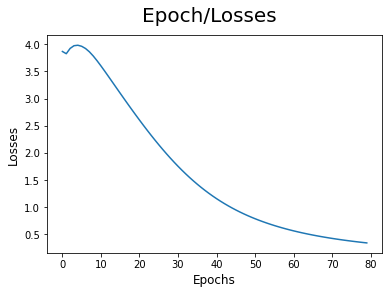

In [73]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

Predict function

In [74]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])] 
    
    return word

In [75]:
# (['we', 'are', 'to', 'study'], 'about')
predict(['we', 'are', 'to', 'study'])

'about'

Accuracy

In [76]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [77]:
accuracy()

1.0

In [78]:
predict(["processes", "manipulate" ,"abstract" ,"things"])

'other'